## Dataset: Roller Coaster Database

## 🛠️ 1. Setup

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Optional: Set seaborn style

In [4]:
sns.set(style="whitegrid")

In [6]:
# Load dataset
df = pd.read_csv("coaster_db.csv")

In [10]:
df.head()

,coaster_name,Length,Speed,Location,Status,Opening date,Type,Manufacturer,Height restriction,Model,...,speed1,speed2,speed1_value,speed1_unit,speed_mph,height_value,height_unit,height_ft,Inversions_clean,Gforce_clean
0,Switchback Railway,600 ft (180 m),6 mph (9.7 km/h),Coney Island,Removed,"June 16, 1884",Wood,LaMarcus Adna Thompson,NaN,Lift Packed,...,6 mph,9.7 km/h,6.0,mph,6.0,50.0,ft,NaN,0,2.9
1,Flip Flap Railway,NaN,NaN,Sea Lion Park,Removed,1895,Wood,Lina Beecher,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.0
2,Switchback Railway (Euclid Beach Park),NaN,NaN,"Cleveland, Ohio, United States",Closed,NaN,Other,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
3,Loop the Loop (Coney Island),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN
4,Loop the Loop (Young's Pier),NaN,NaN,Other,Removed,1901,Steel,Edwin Prescott,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN


## 📊 2. Initial Exploration

In [15]:
print(df.shape)

(1087, 56)


In [17]:
print(df.columns)

Index(['coaster_name', 'Length', 'Speed', 'Location', 'Status', 'Opening date',
       'Type', 'Manufacturer', 'Height restriction', 'Model', 'Height',
       'Inversions', 'Lift/launch system', 'Cost', 'Trains', 'Park section',
       'Duration', 'Capacity', 'G-force', 'Designer', 'Max vertical angle',
       'Drop', 'Soft opening date', 'Fast Lane available', 'Replaced',
       'Track layout', 'Fastrack available', 'Soft opening date.1',
       'Closing date', 'Opened', 'Replaced by', 'Website',
       'Flash Pass Available', 'Must transfer from wheelchair', 'Theme',
       'Single rider line available', 'Restraint Style',
       'Flash Pass available', 'Acceleration', 'Restraints', 'Name',
       'year_introduced', 'latitude', 'longitude', 'Type_Main',
       'opening_date_clean', 'speed1', 'speed2', 'speed1_value', 'speed1_unit',
       'speed_mph', 'height_value', 'height_unit', 'height_ft',
       'Inversions_clean', 'Gforce_clean'],
      dtype='object')


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1087 entries, 0 to 1086
Data columns (total 56 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   coaster_name                   1087 non-null   object 
 1   Length                         953 non-null    object 
 2   Speed                          937 non-null    object 
 3   Location                       1087 non-null   object 
 4   Status                         874 non-null    object 
 5   Opening date                   837 non-null    object 
 6   Type                           1087 non-null   object 
 7   Manufacturer                   1028 non-null   object 
 8   Height restriction             831 non-null    object 
 9   Model                          744 non-null    object 
 10  Height                         965 non-null    object 
 11  Inversions                     932 non-null    float64
 12  Lift/launch system             795 non-null    o

In [21]:
df.describe()

,Inversions,year_introduced,latitude,longitude,speed1_value,speed_mph,height_value,height_ft,Inversions_clean,Gforce_clean
count,932.000000,1087.000000,812.000000,812.000000,937.000000,937.000000,965.000000,171.000000,1087.000000,362.000000
mean,1.547210,1994.986201,38.373484,-41.595373,53.850374,48.617289,89.575171,101.996491,1.326587,3.824006
std,2.114073,23.475248,15.516596,72.285227,23.385518,16.678031,136.246444,67.329092,2.030854,0.989998
min,0.000000,1884.000000,-48.261700,-123.035700,5.000000,5.000000,4.000000,13.100000,0.000000,0.800000
25%,0.000000,1989.000000,35.031050,-84.552200,40.000000,37.300000,44.000000,51.800000,0.000000,3.400000
50%,0.000000,2000.000000,40.289800,-76.653600,50.000000,49.700000,79.000000,91.200000,0.000000,4.000000
75%,3.000000,2010.000000,44.799600,2.778100,63.000000,58.000000,113.000000,131.200000,2.000000,4.500000
max,14.000000,2022.000000,63.230900,153.426500,240.000000,149.100000,3937.000000,377.300000,14.000000,12.000000


## 🧹 3. Clean Up

In [24]:
# Drop irrelevant or duplicate columns (adjust as needed)
df_clean = df[[
    'coaster_name', 'Location', 'Status', 'Type_Main', 'Manufacturer', 'speed_mph',
    'height_value', 'Inversions_clean', 'Gforce_clean', 'year_introduced'
]].copy()

In [28]:
df_clean.head()

,coaster_name,Location,Status,Type_Main,Manufacturer,speed_mph,height_value,Inversions_clean,Gforce_clean,year_introduced
0,Switchback Railway,Coney Island,Removed,Wood,LaMarcus Adna Thompson,6.0,50.0,0,2.9,1884
1,Flip Flap Railway,Sea Lion Park,Removed,Wood,Lina Beecher,NaN,NaN,1,12.0,1895
2,Switchback Railway (Euclid Beach Park),"Cleveland, Ohio, United States",Closed,Other,NaN,NaN,NaN,0,NaN,1896
3,Loop the Loop (Coney Island),Other,Removed,Steel,Edwin Prescott,NaN,NaN,1,NaN,1901
4,Loop the Loop (Young's Pier),Other,Removed,Steel,Edwin Prescott,NaN,NaN,1,NaN,1901


In [30]:
# Drop nulls for critical columns
df_clean.dropna(subset=['speed_mph', 'height_value'], inplace=True)

## 📈 4. Univariate Visualizations
## ✅ 1. histplot – Histogram

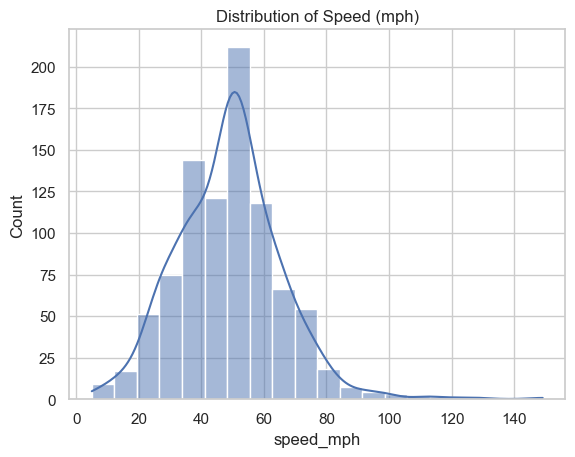

In [36]:
sns.histplot(data=df_clean, x='speed_mph', bins=20, kde=True)
plt.title('Distribution of Speed (mph)')
plt.show()

**Explanation:**

    Purpose: Shows how many coasters fall into different speed ranges.
    
    bins=20: Splits speeds into 20 intervals (e.g., 40–45, 45–50…).
    
    kde=True: Adds a smooth line to show the overall shape of the speed distribution.
    
    x='speed_mph': The variable shown along the x-axis.

## ✅ 2. countplot – Frequency of Categories

In [44]:
df.Type_Main.value_counts()

Type_Main
Steel    816
Wood     198
Other     73
Name: count, dtype: int64

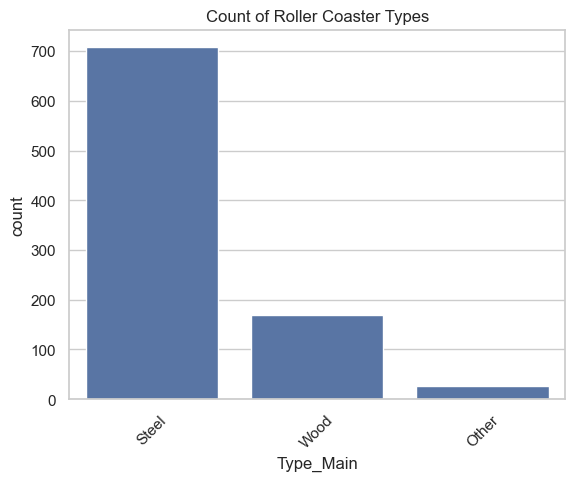

In [42]:
sns.countplot(data=df_clean, x='Type_Main', order=df_clean['Type_Main'].value_counts().index)
plt.title('Count of Roller Coaster Types')
plt.xticks(rotation=45)
plt.show()

**Explanation:**

    Purpose: Shows how many coasters belong to each main type (e.g. Steel, Wooden).
    
    order=...: Ensures bars are sorted by count.
    
    x='Type_Main': Coaster type is plotted on x-axis.
    
    rotation=45: Rotates x-axis labels so they don’t overlap.

## ✅ 3. scatterplot – Comparing Two Numerical Variables

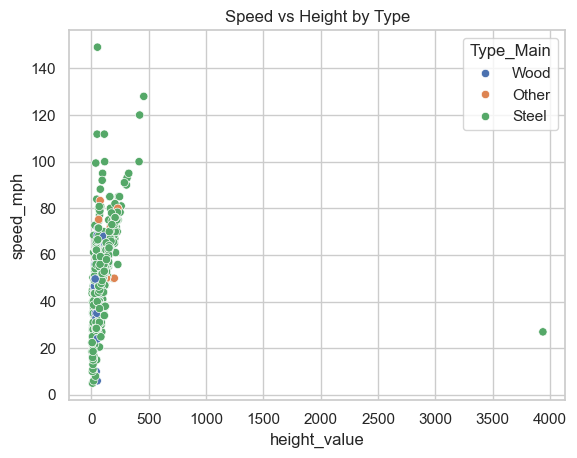

In [57]:
sns.scatterplot(data=df_clean, x='height_value', y='speed_mph', hue='Type_Main')
plt.title('Speed vs Height by Type')
plt.show()

**Explanation:**
  
    Purpose: Each dot represents a coaster.
    
    x='height_value': Plotted on the x-axis.
    
    y='speed_mph': Plotted on the y-axis.
    
    hue='Type_Main': Colors dots by coaster type.
    
    Use: See if taller coasters are also faster.

## ✅ 4. boxplot – Distribution Comparison Across Categories

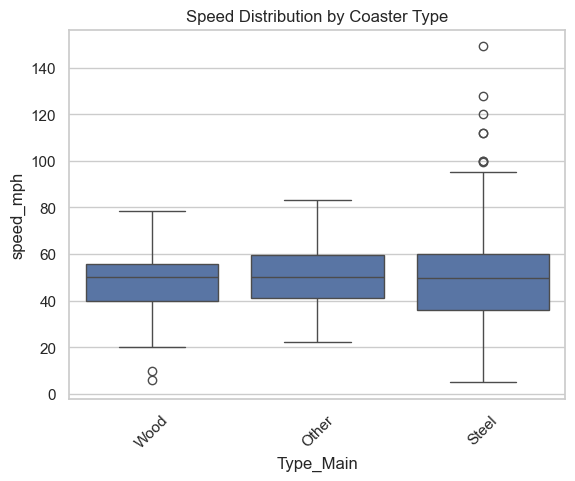

In [61]:
sns.boxplot(data=df_clean, x='Type_Main', y='speed_mph')
plt.title('Speed Distribution by Coaster Type')
plt.xticks(rotation=45)
plt.show()

**Explanation:**

    Purpose: Shows min, max, median, and quartiles for each type.
    
    x='Type_Main': Categories.
    
    y='speed_mph': Values being compared.
    
    Great for spotting outliers and comparing spreads.

## ✅ 5. barplot – Mean (or other stat) by Category

In [67]:
top_mfg = df_clean['Manufacturer'].value_counts().head(10).index
top_mfg

Index(['Vekoma', 'Bolliger & Mabillard', 'Intamin', 'Mack Rides',
       'Arrow Dynamics', 'Gerstlauer', 'Anton Schwarzkopf',
       'Rocky Mountain Construction', 'Philadelphia Toboggan Coasters',
       'Custom Coasters International'],
      dtype='object', name='Manufacturer')

In [69]:
df_clean[df_clean['Manufacturer'].isin(top_mfg)]

,coaster_name,Location,Status,Type_Main,Manufacturer,speed_mph,height_value,Inversions_clean,Gforce_clean,year_introduced
32,Thunderhawk (Dorney Park),Dorney Park & Wildwater Kingdom,Operating,Wood,Philadelphia Toboggan Coasters,45.0,80.0,0,NaN,1924
47,Wildcat (Lake Compounce),Lake Compounce,Operating,Wood,Philadelphia Toboggan Coasters,48.0,85.0,0,NaN,1927
53,Yankee Cannonball,Canobie Lake Park,Operating,Wood,Philadelphia Toboggan Coasters,35.0,19.8,0,NaN,1930
62,Rollo Coaster,Idlewild and Soak Zone,Operating,Wood,Philadelphia Toboggan Coasters,25.0,27.0,0,NaN,1938
67,Comet (Hersheypark),Hersheypark,Operating,Wood,Philadelphia Toboggan Coasters,50.0,84.0,0,NaN,1946
...,...,...,...,...,...,...,...,...,...,...
1080,Iron Gwazi,Busch Gardens Tampa Bay,Under construction,Steel,Rocky Mountain Construction,76.0,206.0,2,NaN,2022
1082,American Dreier Looping,Other,NaN,Steel,Anton Schwarzkopf,53.0,111.0,3,4.7,2022
1083,Pantheon (roller coaster),Busch Gardens Williamsburg,Under construction,Steel,Intamin,73.0,178.0,2,NaN,2022
1084,Tron Lightcycle Power Run,Other,NaN,Steel,Vekoma,59.3,78.1,0,4.0,2022


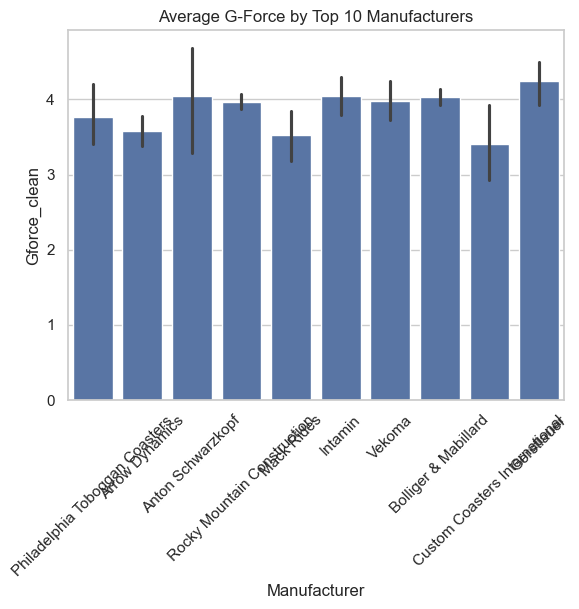

In [71]:
sns.barplot(data=df_clean[df_clean['Manufacturer'].isin(top_mfg)],
            x='Manufacturer', y='Gforce_clean', estimator='mean')
plt.xticks(rotation=45)
plt.title('Average G-Force by Top 10 Manufacturers')
plt.show()

**Explanation:**

    Purpose: Compare average G-force across the top 10 manufacturers.
    
    estimator='mean': Computes the average for each group.
    
    isin(top_mfg): Filters data to top 10 manufacturers.

## ✅ 6. heatmap – Visualizing Correlation

In [76]:
numeric_cols = ['speed_mph', 'height_value', 'Inversions_clean', 'Gforce_clean']
corr = df_clean[numeric_cols].corr()
corr


,speed_mph,height_value,Inversions_clean,Gforce_clean
speed_mph,1.000000,0.241461,0.263946,0.494178
height_value,0.241461,1.000000,0.093900,0.331460
Inversions_clean,0.263946,0.093900,1.000000,0.387713
Gforce_clean,0.494178,0.331460,0.387713,1.000000


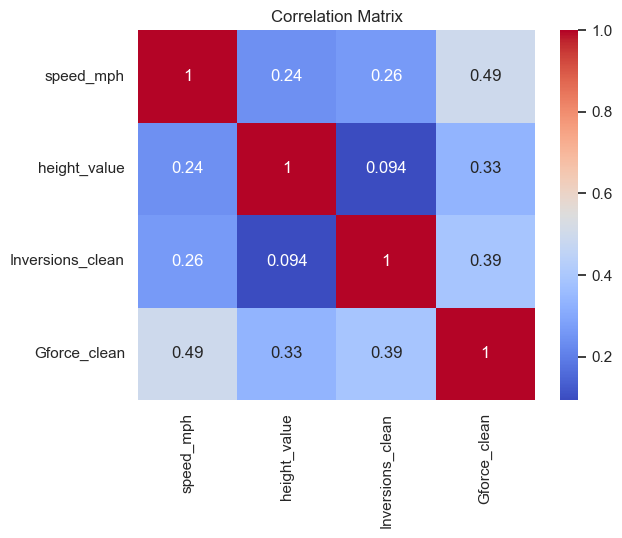

In [78]:
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**Explanation:**

    Purpose: Show how strongly numeric variables relate to each other.
    
    annot=True: Shows the actual correlation values inside the boxes.
    
    cmap='coolwarm': Sets the color style (red–blue scale).

## ✅ 7. lmplot – Faceted Scatter Plots

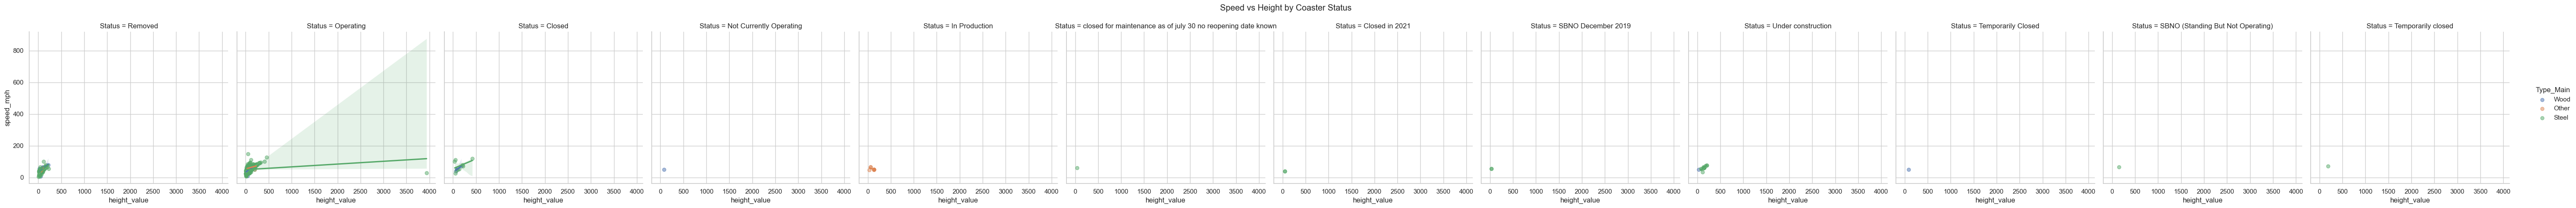

In [87]:
sns.lmplot(data=df_clean, x='height_value', y='speed_mph', col='Status', hue='Type_Main', 
           height=5, aspect=1, scatter_kws={'alpha':0.5})
plt.subplots_adjust(top=0.85)
plt.suptitle('Speed vs Height by Coaster Status')
plt.show()

**Explanation:**
  
    Purpose: Create scatter plots side-by-side, grouped by status (e.g. Operating vs. Closed).
    
    col='Status': One plot per coaster status.
    
    hue='Type_Main': Color dots by coaster type.
    
    scatter_kws: Styling for dots (transparency here).

## 🧠 What Did I Learn?

    Most coasters are between 40–80 mph, with a handful that go above 100 mph.
    
    Steel coasters are by far the most common and tend to be faster.
    
    Taller rides don’t always mean faster rides.
    
    Manufacturers vary in the thrill levels (G-force) they design for.
    
    All of this came not from staring at raw numbers, but from visualizing the data.